In [36]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Config

In [25]:
# Sampling frequencies (hz)
ACC_FREQ = 5

# Data paths
DATA_WALKING = 'data/chest_phone_walking.json'
DATA_STANDING = 'data/chest_phone_standing.json'
DATA_SITTING = 'data/chest_phone_sitting.json'

DATA_PATHS = {'walking':DATA_WALKING,
              'standing':DATA_STANDING,
              'sitting':DATA_SITTING}

#### Read and explore data

In [27]:
data_all = pd.DataFrame()

for activity, path in DATA_PATHS.items():
    
    data = pd.read_json(path)
    data['time'] = data['index'] / ACC_FREQ
    data.rename({'xAcceleration':'x','yAcceleration':'y','zAcceleration':'z'}, axis=1, inplace=True)
    data = data[['time','x','y','z']]
    data['label'] = activity
    data_all = pd.concat([data_all, data])

print(data_all.shape)
data_all.head()

(1407, 5)


,time,x,y,z,label
0,0.0,0.736145,-0.547516,-0.369186,walking
1,0.2,0.696747,-0.577118,-0.329285,walking
2,0.4,0.613724,-0.555862,-0.321625,walking
3,0.6,0.836792,-0.697159,-0.424255,walking
4,0.8,0.907486,-0.552719,-0.244049,walking


/Users/HarrisonHoffman/Desktop/DataScience/envs/baseprojects/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

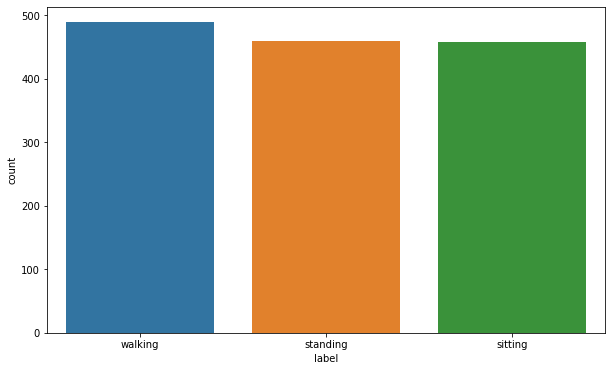

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data_all['label'])

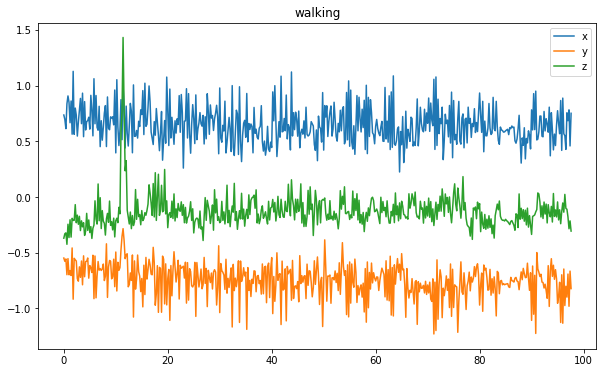

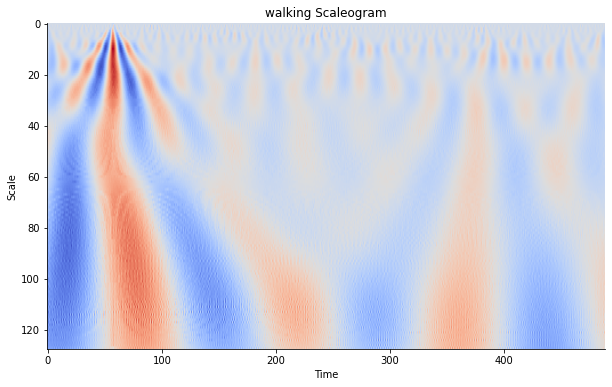

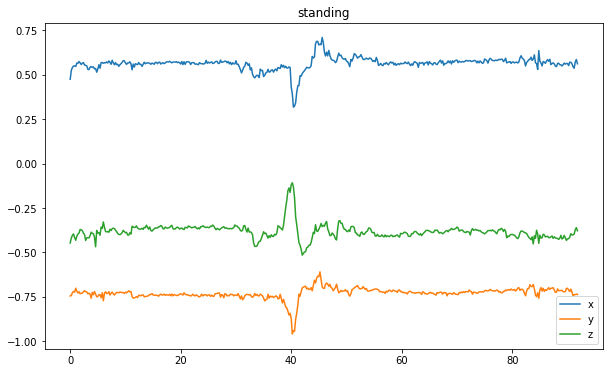

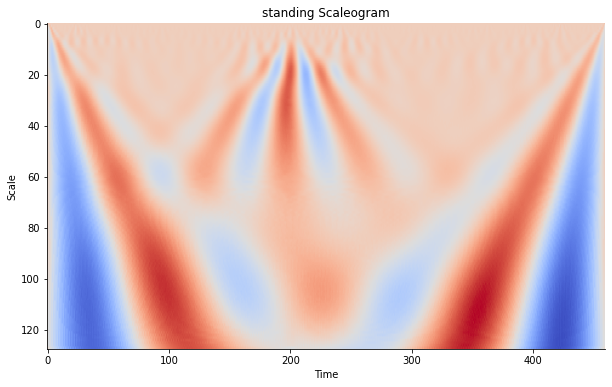

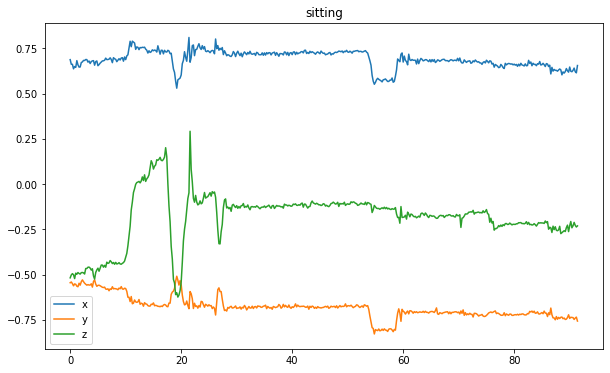

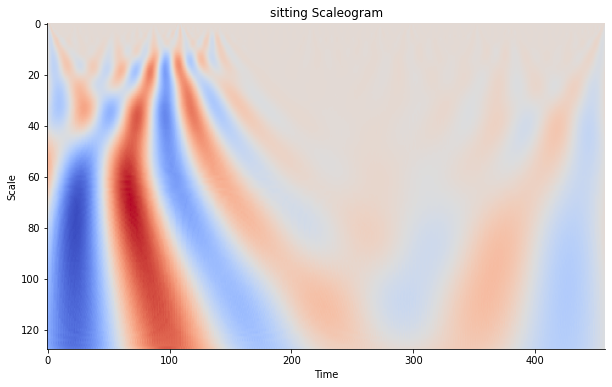

In [51]:
for activity in data_all['label'].unique():
    
    data_activity = data_all[data_all['label'] == activity]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    for axis in ['x','y','z']:

        ax.plot(data_activity['time'], data_activity[axis], label=axis)
        
    ax.set_title(activity)
    ax.legend()
    plt.show()
    
    coeffs, freqs = pywt.cwt(data_activity['z'], np.arange(1, 129), wavelet = 'morl')
        
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(coeffs, cmap = 'coolwarm', aspect = 'auto')
    ax.set_title(f'{activity} Scaleogram')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel('Scale')
    ax.set_xlabel('Time')
    plt.show()
        
    